In [1]:
#install.packages('package-name',repos='http://cran.us.r-project.org')
#https://cs.hse.ru/data/2015/05/14/1098547089/4._Centrality_Metrics.pdf
library(igraph)
el=read.csv('lon_mcm.input',header=FALSE,sep=' ')   #file.choose()) # read the 'el.with.weights.csv' file 
g=graph.data.frame(el)
E(g)$weight<-E(g)$V3



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
EigenCentrality = eigen_centrality(g, directed=TRUE, weights=E(g)$weight)$vector
EigenCentrality = EigenCentrality/max(EigenCentrality)



Warning message in eigen_centrality(g, directed = TRUE, weights = E(g)$weight):
“At centrality.c:362 :Weighted directed graph in eigenvector centrality”

In [3]:

PageRank= page_rank(g, algo = c('prpack', 'arpack', 'power'), vids = V(g),
     directed = TRUE, damping = 0.85, personalized = NULL, weights = NULL,
     options = NULL)$vector
PageRank=PageRank/max(PageRank)


In [4]:
Betweenness=betweenness(g, directed=TRUE)
Betweenness = Betweenness/max(Betweenness)


In [5]:
Hubs = hub_score(g)$vector


In [6]:
Authorities=authority_score(g)$vector


In [7]:
Closeness = closeness(g, vids = V(g), mode = c( "all"),
  weights = NULL, normalized = TRUE)
Closeness = Closeness/max(Closeness)

In [8]:
Flux = strength(g,vids=V(g),mode=c("all"))
Flux = Flux/max(Flux)

FluxIn = strength(g,vids=V(g),mode=c("in"))
FluxIn = FluxIn/max(FluxIn)

FluxOut = strength(g,vids=V(g),mode=c("out"))
FluxOut = FluxOut/max(FluxOut)


In [9]:
library(Hmisc)
library(ggplot2)
require(reshape2)

df = data.frame(Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs)

df1 <- melt(df ,  id.vars = 'Flux', variable.name = 'series')
df1$Value = df1$value

df

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: reshape2


,Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs
C4PAN1,8.855948e-05,7.851807e-05,9.881112e-05,0.9762374,0.000000e+00,0.011885509,0.000000e+00,7.652317e-18,4.585780e-13
C4PAN2,4.077315e-06,3.402690e-06,4.766062e-06,0.9983249,0.000000e+00,0.008360132,0.000000e+00,1.437027e-18,3.162080e-14
C4PAN3,3.424854e-05,2.838871e-05,4.023104e-05,0.9855790,0.000000e+00,0.007174297,0.000000e+00,3.508790e-18,2.756771e-13
C4PAN5,1.167271e-08,1.138706e-08,1.196435e-08,0.9999996,0.000000e+00,0.008072433,2.512437e-03,3.508790e-18,8.351685e-18
C4PAN6,2.679662e-06,2.424529e-06,2.940136e-06,0.9993987,0.000000e+00,0.028404731,7.336315e-03,1.437027e-18,1.444659e-14
C535OOH,1.070933e-06,1.057757e-06,1.084385e-06,0.9999941,0.000000e+00,0.011973541,2.110447e-03,2.155541e-18,2.475643e-16
BUTALO2,2.412240e-04,2.448886e-04,2.374826e-04,0.9997575,0.000000e+00,0.002989387,2.018324e-03,2.511264e-16,3.598099e-18
HO1CO3CHO,7.896207e-05,1.212116e-04,3.582800e-05,0.9989088,0.000000e+00,0.006296835,7.336315e-03,8.011573e-18,4.359817e-13
CO2C3OOA,8.002626e-08,7.920573e-08,8.086396e-08,0.9999784,0.000000e+00,0.001801241,9.212267e-05,1.012409e-16,8.753016e-16
IEB1CHO,8.215677e-08,8.131645e-08,8.301467e-08,0.9998929,0.000000e+00,0.001837215,7.118570e-04,2.790277e-18,5.033926e-19


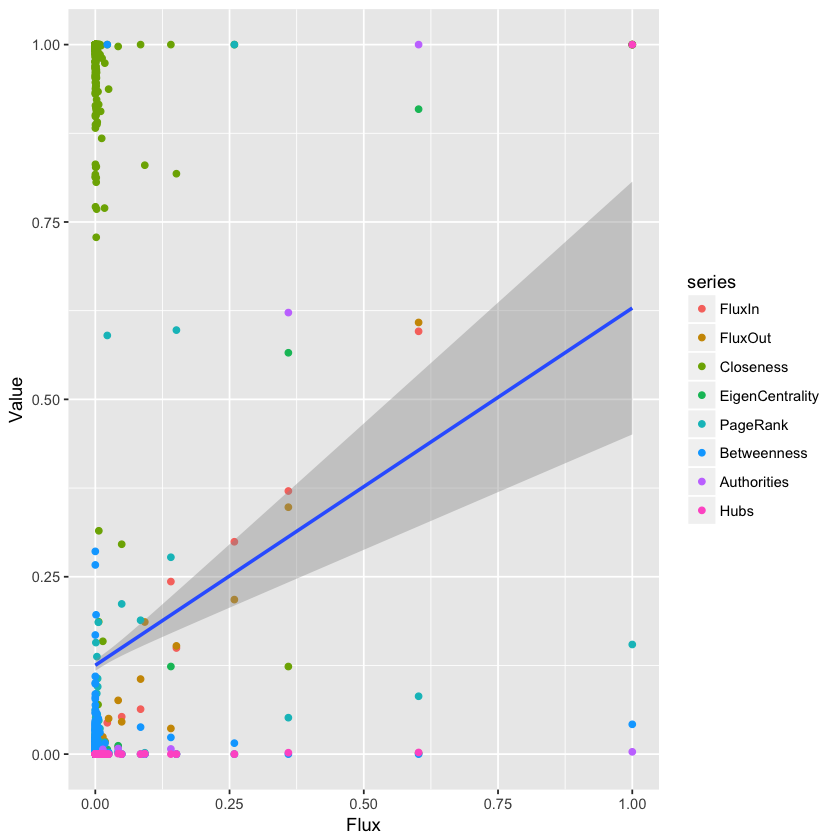

In [10]:
ggplot(df1, aes(Flux,Value)) + geom_point(aes(colour = series))+
geom_smooth(method='lm')



In [11]:
write.csv(df, file = "centrality.csv")

In [12]:
edge_density(g, loops = FALSE)

[1] 0.003527257